In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(7163, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-19 18:20:44,www.google.com
1,2022-01-19 18:20:49,www.compassgroupcareers.com
2,2022-01-19 18:20:59,www.compassgroupcareers.com
3,2022-01-19 18:21:04,www.compassgroupcareers.com
4,2022-01-19 18:21:23,www.compassgroupcareers.com


In [4]:
df.tail()

,Time,domain
7158,2022-04-19 16:49:00,localhost:8888
7159,2022-04-19 16:49:36,localhost:8888
7160,2022-04-19 16:49:50,localhost:8888
7161,2022-04-19 16:51:39,localhost:8889
7162,2022-04-19 16:51:47,localhost:8889


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-19 18:20:44,www.google.com
1,2022-01-19 18:20:49,www.compassgroupcareers.com
2,2022-01-19 18:20:59,www.compassgroupcareers.com
3,2022-01-19 18:21:04,www.compassgroupcareers.com
4,2022-01-19 18:21:23,www.compassgroupcareers.com


In [14]:
df['domain'].value_counts()[:50]

www.google.com                                                   1387
colab.research.google.com                                         882
webauth.umbc.edu                                                  705
my.umbc.edu                                                       246
mail.google.com                                                   178
blackboard.umbc.edu                                               176
docs.google.com                                                   156
github.com                                                        120
www.youtube.com                                                    93
www.csee.umbc.edu                                                  90
www.netflix.com                                                    90
highpoint-prd.ps.umbc.edu                                          80
www.amazonuniversity.jobs                                          80
www.chegg.com                                                      76
goldmansachs.tal.net

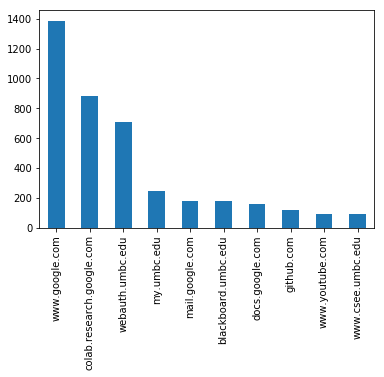

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     314
1     113
2     125
3      25
4      11
5      69
6      27
7      24
8      92
9     121
10    197
11    436
12    433
13    644
14    533
15    507
16    331
17    591
18    403
19    648
20    430
21    335
22    367
23    387
Name: domain, dtype: int64

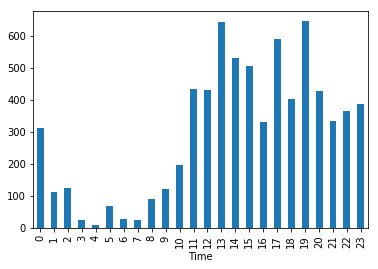

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-19 18:20:44,www.google.com,Wednesday,2
1,2022-01-19 18:20:49,www.compassgroupcareers.com,Wednesday,2
2,2022-01-19 18:20:59,www.compassgroupcareers.com,Wednesday,2
3,2022-01-19 18:21:04,www.compassgroupcareers.com,Wednesday,2
4,2022-01-19 18:21:23,www.compassgroupcareers.com,Wednesday,2


In [19]:
df['Day'].value_counts()

Wednesday    1656
Monday       1374
Tuesday      1279
Thursday      910
Sunday        796
Friday        606
Saturday      542
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1374
1    1279
2    1656
3     910
4     606
5     542
6     796
Name: DayIndex, dtype: int64

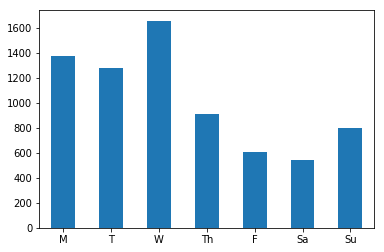

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-19 18:20:44,www.google.com,Wednesday,2,False
1,2022-01-19 18:20:49,www.compassgroupcareers.com,Wednesday,2,False
2,2022-01-19 18:20:59,www.compassgroupcareers.com,Wednesday,2,False
3,2022-01-19 18:21:04,www.compassgroupcareers.com,Wednesday,2,False
4,2022-01-19 18:21:23,www.compassgroupcareers.com,Wednesday,2,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
91,2022-01-22 11:10:17,www.primevideo.com,Saturday,5,True
92,2022-01-22 11:18:29,mail.google.com,Saturday,5,True
93,2022-01-22 11:26:46,www.primevideo.com,Saturday,5,True
94,2022-01-22 11:35:51,mail.google.com,Saturday,5,True
95,2022-01-22 11:41:34,drive.google.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com               1100
colab.research.google.com     766
webauth.umbc.edu              589
my.umbc.edu                   227
mail.google.com               150
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com               287
webauth.umbc.edu             116
colab.research.google.com    116
blackboard.umbc.edu           36
www.netflix.com               28
Name: domain, dtype: int64

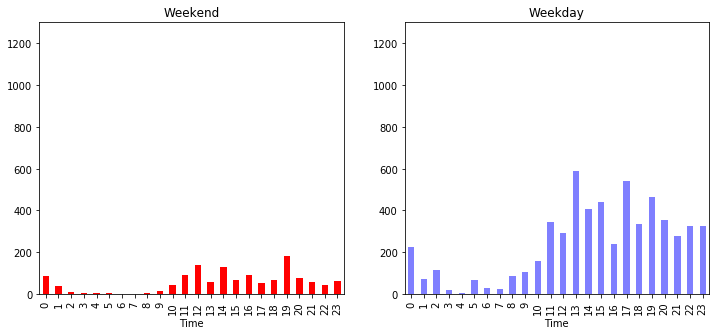

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

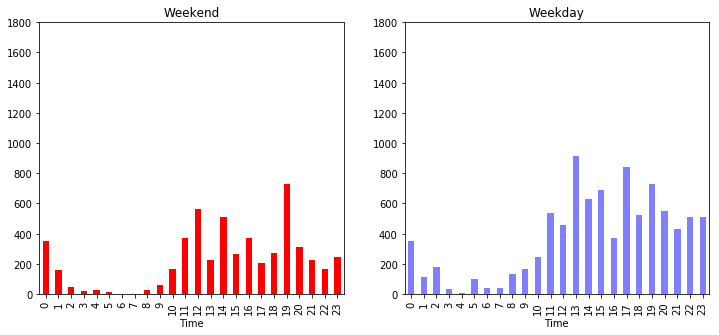

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com               1387
colab.research.google.com     882
webauth.umbc.edu              705
my.umbc.edu                   246
mail.google.com               178
blackboard.umbc.edu           176
docs.google.com               156
github.com                    120
www.youtube.com                93
www.csee.umbc.edu              90
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

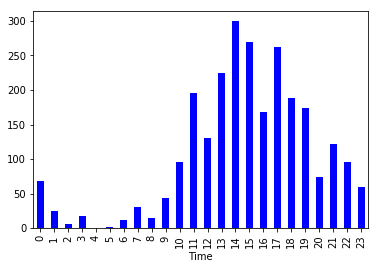

In [40]:
_= show_domain_stats('umbc', 'blue')

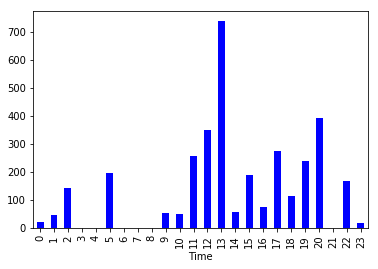

In [41]:
_= show_domain_stats('colab', 'blue')

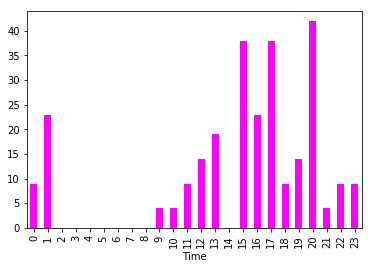

In [35]:
_ = show_domain_stats('stackover', 'magenta')


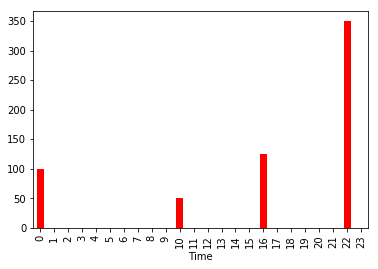

In [42]:
_ = show_domain_stats('steam', 'red')

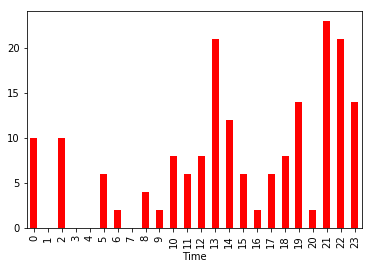

In [37]:
_ = show_domain_stats('netflix', 'red')

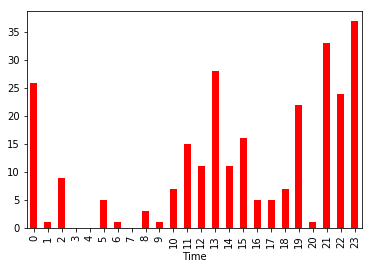

In [38]:
_ = show_domain_stats('netflix|disney|prime', 'red')

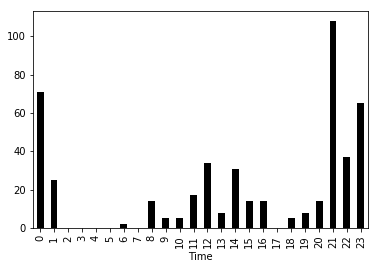

In [39]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. According to the data it is Personal computer

2. No,by looking at the sites that person is a full time student at umbc in IT field

3. Watching series/movies and coding are the main interests

4. -> This person is looking for jobs

   -> Has amazon prime,netflix,hotstar,jiocinema accounts
   
   -> uses laptop mostly on weekdays than weekends
   
   -> sleeps around 1am - 2am and wake up around 8am